### Import data using python API

In [ ]:
pip install ucimlrepo

In [30]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 

### Convert to pandas dataframe

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


### Description and CustomerID have null values, while CustomerID has large missing data. Let's check rows that have null values in Description first, since it has lower null value than other (around 1500 transactions). 

In [34]:
X[X['Description'].isnull()].head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


### These data look little bit odd. Null values in Description looks like some kind of data entry error. It would be better if we drop these rows.

In [35]:
X = X.dropna(subset = "Description")
X[X['Description'].isnull()].head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Since we have dropped NAN rows from Description column, now let's take a look in the CustomerID missing values

In [36]:
X[X['CustomerID'].isnull()].head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom


In [37]:
# percentage of unregistered customers after removing data entry error
guest_cust = round((X['CustomerID'].isnull().sum()) / X.shape[0] * 100, 2)

print(f"There are {guest_cust}% transactions come from unregistered/guest buyers, who are much less loyal than registered ones.")

There are 24.72% transactions come from unregistered/guest buyers, who are much less loyal than registered ones.


### It would be better if we removed these unregistered transactions, rather than registering them as guests with unique IDs for grouped transactions on the same date and time.

In [38]:
# Transform InvoiceDate column into DateTime format
df = X.copy()
df = df.dropna(subset = ["CustomerID"])
# transform CustomerID to character object
df["CustomerID"] = df["CustomerID"].astype("str")

# remove .0 from the end of each CustomerID row
df["CustomerID"] = df["CustomerID"].replace('\.0$', '', regex = True)

# transform InvoiceDate column into a date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")

In [39]:
df.to_csv("raw_no_nan.csv", index = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  object        
 5   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 21.7+ MB


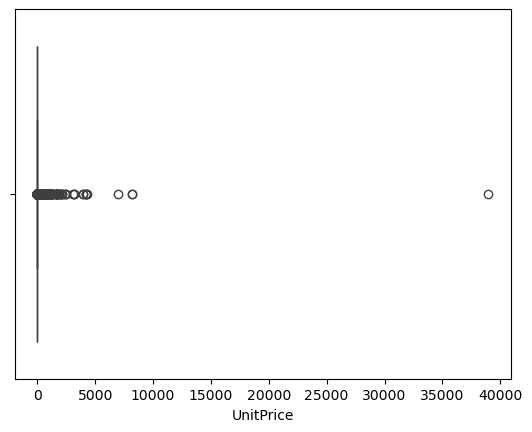

In [40]:
# check UnitPrice distribution
sns.boxplot(x = df["UnitPrice"])
plt.show()
# Price of some unit is larger than the overall data

In [41]:
# total spending on each transaction
df["TotalSpending"] = df["Quantity"] * df["UnitPrice"]

df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [42]:
# create new dataframe with count of total transaction
df_new = df.groupby("CustomerID")["InvoiceDate"].count().reset_index()
# rename column name to Frequency
df_new = df_new.rename(columns = {"InvoiceDate" : "Frequency"})

In [43]:
# check if the total transaction is 0
df_new[df_new["Frequency"] == 0]

,CustomerID,Frequency


In [44]:
# Create a column with total revenue from each unique customers
df_new["Monetary"] = df.groupby("CustomerID")["TotalSpending"].sum().reset_index()[["TotalSpending"]]

In [45]:
# extract the next day of the last data collection date in the data frame for a reference point of time
last_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
# last date when individual customer has purchase something
last_purchase_date = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
# difference between last purchase date and reference date
last_purchase_date["diff"] = last_date - last_purchase_date["InvoiceDate"]
# extract only days of last purchase from reference day
df_new["Recency"] = last_purchase_date["diff"].dt.days

In [46]:
df_new

,CustomerID,Frequency,Monetary,Recency
0,12346,2,0.00,326
1,12347,182,4310.00,2
2,12348,31,1797.24,75
3,12349,73,1757.55,19
4,12350,17,334.40,310
...,...,...,...,...
4367,18280,10,180.60,278
4368,18281,7,80.82,181
4369,18282,13,176.60,8
4370,18283,756,2094.88,4


In [47]:
# save the dataframe as RFM_clean
df_new.to_csv("RFM_clean.csv", index = False)